Notes:
- Simulation is a three stage deal:
    - Generate muons isotropically within the DS trap region, allow them to propigate for 700 ns (no decay)
    - Use that output to further evolve remaining muons, allowing them to decay to electrons.
    - Run full output through TrkAna, see if any tracks are reconstructed.
- Their are two copies of each 2nd stage muon in `ntpart`.
    - Looks like copy 1 has t==0, p==100, pstop=p at 700ns
    - The second muon has t=~700, p==100, parent_pstop = original p_stop
- No muons have an initial timestamp > 700 ns
- No electrons are born before 700 ns
- Skimmed vd requires electron to have been produced in the event, and it must have had energy>75 MeV


### Some Findings

Number of trapped muons per init muon p:
* p=140: 37918*300 = 11,375,400

Number of unique events in which an electron with p>95 makes it farther upstream than 11200mm:
* Muon init p=140: 195 Events (About 1/60,000)

# Initial Loading and Data Cleaning

In [1]:
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import g4root_to_df
from root_pandas import read_root
import pandas as pd
from mu2e.mu2eplots import mu2e_plot3d_ptrap
from mu2e.mu2eplots import mu2e_plot3d_ptrap_traj
from mu2e.mu2eplots import mu2e_plot3d_ptrap_anim
import cPickle as pkl
from bb.tools.hist_tools_modified import hist
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
mu2e_ext_path2 = '/Volumes/DataDump/Mu2E/'

Welcome to JupyROOT 6.08/02


ImportError: No module named externals

In [2]:
pd.options.display.max_columns = 110

In [49]:
store = pd.HDFStore(mu2e_ext_path2+'iso_muons_GA05_stage2_vd_140p_skim.h5')
df_ntpart = store.df_ntpart
df_nttvd = store.df_nttvd
store.close()


store_xray = pd.HDFStore(mu2e_ext_path+'datafiles/G4ParticleSim/low_e_ele_0T_v580.h5')
df_xray = store_xray.df_ntpart
store_xray.close()


In [3]:
store = pd.HDFStore(mu2e_ext_path2+'iso_muons_GA05_trkana_140p_skim.h5')
df_trkana = store.df_trkana
store.close()

store = pd.HDFStore(mu2e_ext_path2+'iso_muons_GA05_trkana_ce.h5')
df_trkana_ce = store.df_trkana_ce
store.close()



In [ ]:
#df_nttvd.set_index(['evt', 'subrun', 'job'], inplace=True)
#df_ntpart.set_index(['evt', 'subrun', 'job'], inplace=True)
#df_trkana = df_trkana.rename(columns={'evtinfo_eventid':'evt', 'evtinfo_subrunid':'subrun', 'evtinfo_job':'job'})
#df_trkana.set_index(['evt', 'subrun', 'job'], inplace=True)

In [ ]:
#df_trkana_ce = read_root(mu2e_ext_path2+'iso_muons_GA05_trkana_ce.root', 'TrkAna/trkana', ['evtinfo', 'dem', 'uem', 'dmm'])
#df_trkana_ce = df_trkana_ce.rename(columns={'evtinfo_eventid':'evt', 'evtinfo_subrunid':'subrun'})
#df_trkana_ce.eval('job=1', inplace=True)
#df_trkana_ce.set_index(['evt', 'subrun', 'job'], inplace=True)
#store = pd.HDFStore(mu2e_ext_path2+'iso_muons_GA05_trkana_ce.h5')
#store['df_trkana_ce'] = df_trkana_ce
#store.close()

In [4]:
df_trkana_dems = df_trkana.query('dem_mom>0')
df_trkana_uems = df_trkana.query('uem_mom>0')
df_trkana_dems_no_uems = df_trkana_dems.ix[~df_trkana_dems.index.isin(df_trkana_uems.index)]

df_trkana_ce_dems = df_trkana_ce.query('dem_mom>0')

In [50]:
bads_index = df_nttvd.query('pdg==11 and z<11200 and p>95').index.unique()
df_ntpart_bads = df_ntpart.ix[bads_index]

# Sanity Plots

In [ ]:
df_ntpart.query('pdg==13 and time>0').pstop.hist(bins=50, color='r')
plt.title('Muon P (t = 700 ns)')
plt.ylabel('Counts')
plt.xlabel('P (MeV)')
plt.yscale('log')

In [ ]:
df_ntpart.query('pdg==13 and time>0').zstop.hist(bins=50, color='r')
plt.title('Muon Z Position (t = 700 ns)')
plt.ylabel('Counts')
plt.xlabel('Z (mm)')
plt.yscale('log')

In [ ]:
df_ntpart.query('pdg==11 and parent_pdg==13').pz.hist(bins=30)
plt.title('Initial Electron Pz (Muon parent p = ~140 MeV)')
plt.ylabel('Counts')
plt.xlabel('Pz (MeV)')

In [ ]:
df_ntpart.query('pdg==11 and parent_pdg==13').p.hist(bins=30)
plt.title('Initial Electron P (Muon parent p = ~140 MeV)')
plt.ylabel('Counts')
plt.xlabel('P (MeV)')
textstr = 'Skim cut: e- mom > 75 MeV'

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.55, 0.85, textstr, transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [ ]:
df_ntpart_bads = df_ntpart.ix[bads_index]

# Deeper Investigation

In [ ]:
df_nttvd_ele_solo = df_nttvd.query('evt==5972661 and subrun==380 and job==15804245 and pdg==11')
df_nttvd_ele_solo.name = 'Sneaky Electron'

In [ ]:
mu2e_plot3d_ptrap_traj(df_nttvd_ele_solo,'z','x','y',df_xray=df_xray,
                        title='Electrons from trapped muons')

In [7]:
cut_string = 'dem_trkqual>0.4 and -80<dem_d0<105 and 450<(dem_d0+2.0/dem_om)<680 and 0.57735<dem_td<1.0'

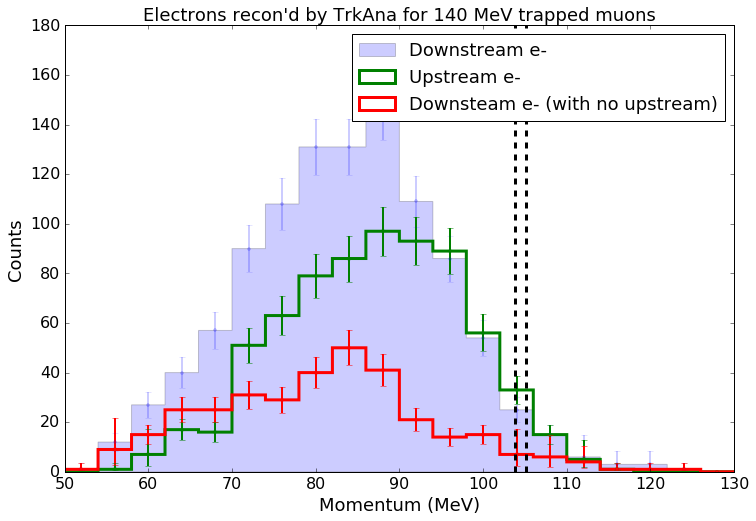

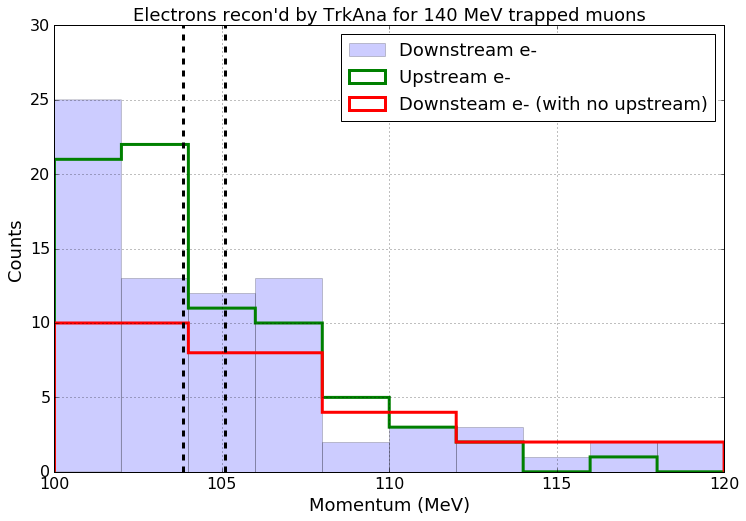

In [8]:
hist(df_trkana_dems.dem_mom, bins=20, range=(50,130), label='Downstream e-', histtype='stepfilled', errorbars=True, alpha=0.2)
hist(df_trkana_uems.uem_mom, bins=20, range=(50,130), label='Upstream e-', histtype='step', linewidth=3, errorbars=True)
hist(df_trkana_dems_no_uems.dem_mom, bins=20, range=(50,130), label='Downsteam e- (with no upstream)', histtype='step', linewidth=3, errorbars=True)

plt.ylim(ymax=180)
plt.plot((103.85, 103.85), (0, 180), 'k--', linewidth=3)
plt.plot((105.1, 105.1), (0, 180), 'k--', linewidth=3)

plt.title("Electrons recon'd by TrkAna for 140 MeV trapped muons")
plt.ylabel('Counts')
plt.xlabel('Momentum (MeV)')
plt.legend(loc='best')

plt.figure()
df_trkana_dems.dem_mom.hist(bins=10, range=(100,120), label='Downstream e-', alpha=0.2)
df_trkana_uems.uem_mom.hist(bins=10, range=(100,120), label='Upstream e-', histtype='step', linewidth=3)
df_trkana_dems_no_uems.dem_mom.hist(bins=5, range=(100,120), label='Downsteam e- (with no upstream)', histtype='step', linewidth=3)

plt.plot((103.85, 103.85), (0, 30), 'k--', linewidth=3)
plt.plot((105.1, 105.1), (0, 30), 'k--', linewidth=3)

plt.title("Electrons recon'd by TrkAna for 140 MeV trapped muons")
plt.ylabel('Counts')
plt.xlabel('Momentum (MeV)')
plt.legend(loc='best')

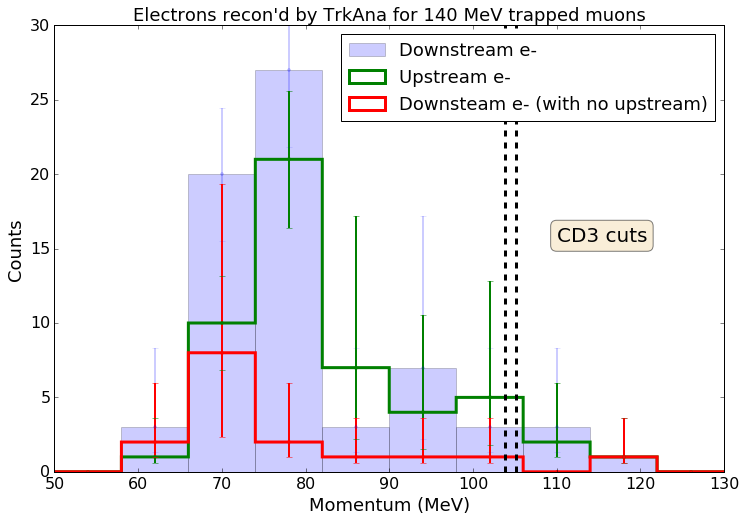

In [9]:
hist(df_trkana_dems.query(cut_string).dem_mom, bins=10, range=(50,130), label='Downstream e-', alpha=0.2, errorbars=True)
hist(df_trkana_uems.query(cut_string).uem_mom, bins=10, range=(50,130), label='Upstream e-', histtype='step', linewidth=3, errorbars=True)
hist(df_trkana_dems_no_uems.query(cut_string).dem_mom, bins=10, range=(50,130), label='Downsteam e- (with no upstream)', histtype='step', linewidth=3, errorbars=True)

plt.plot((103.85, 103.85), (0, 30), 'k--', linewidth=3)
plt.plot((105.1, 105.1), (0, 30), 'k--', linewidth=3)

plt.title("Electrons recon'd by TrkAna for 140 MeV trapped muons")
plt.ylabel('Counts')
plt.xlabel('Momentum (MeV)')
plt.legend(loc='best')
textstr = 'CD3 cuts'

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.75, 0.55, textstr, transform=plt.gca().transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

In [ ]:
hist(df_ntpart_bads.query('pdg==11 and parent_pdg==13').x, bins=20, alpha=0.5, histtype='stepfilled', normed=True, range=(-600,600), errorbars=True, label='Sneaky Electrons')
hist(df_ntpart.query('pdg==11 and parent_pdg==13').x, bins=20, alpha=0.5, histtype='stepfilled', normed=True, range=(-600,600), errorbars=True, label='All Electrons')
plt.title('Electron Birth Location, X Position')
plt.xlabel('X (mm)')
plt.ylabel('Counts (Normalized)')
plt.legend(loc='best')

In [ ]:
hist(df_ntpart_bads.query('pdg==11 and parent_pdg==13').y, bins=20, alpha=0.5, normed=True, label='Sneaky Electrons', range=(-1000,500), histtype='stepfilled', errorbars=True)
hist(df_ntpart.query('pdg==11 and parent_pdg==13').y, bins=20, alpha=0.5, normed=True, label='All Electrons', range=(-1000,500), histtype='stepfilled', errorbars=True)
plt.title('Electron Birth Location, Y Position')
plt.xlabel('Y (mm)')
plt.ylabel('Counts (Normalized)')
plt.legend(loc='best')
#plt.yscale('log')
#plt.ylim(ymin=1e-15)

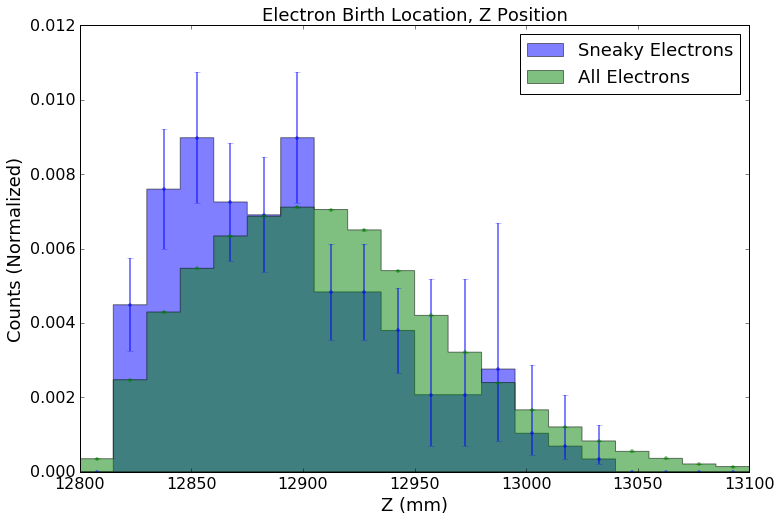

In [51]:
hist(df_ntpart_bads.query('pdg==11 and parent_pdg==13').z, bins=20, alpha=0.5, normed=True, label='Sneaky Electrons', range=(12800, 13100), histtype='stepfilled', errorbars=True )
hist(df_ntpart.query('pdg==11 and parent_pdg==13').z, bins=20, alpha=0.5, normed=True, label='All Electrons', range=(12800,13100), histtype='stepfilled', errorbars=True)
plt.title('Electron Birth Location, Z Position')
plt.ylim(ymax=0.012)
plt.xlabel('Z (mm)')
plt.ylabel('Counts (Normalized)')
plt.legend(loc='best')

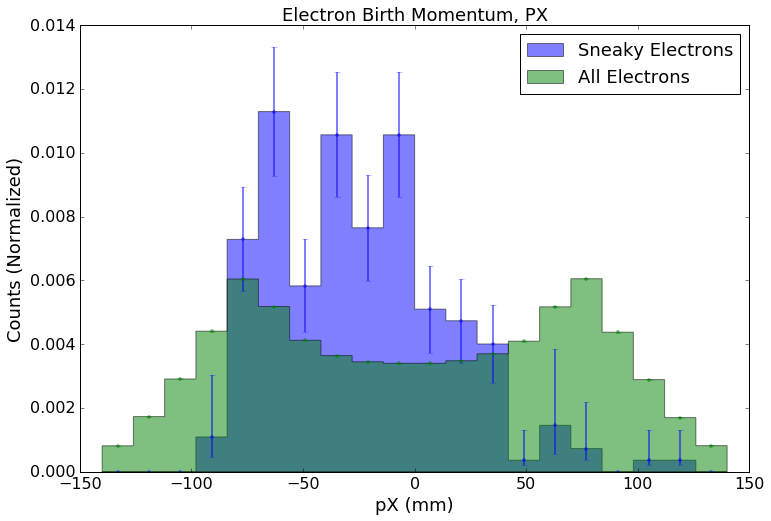

In [53]:
hist(df_ntpart_bads.query('pdg==11 and parent_pdg==13').px, bins=20, alpha=0.5, normed=True, range=(-140,140), label='Sneaky Electrons', histtype='stepfilled', errorbars=True)
hist(df_ntpart.query('pdg==11 and parent_pdg==13').px, bins=20, alpha=0.5, normed=True, range=(-140,140), label='All Electrons', histtype='stepfilled', errorbars=True)
plt.title('Electron Birth Momentum, PX')
plt.xlabel('pX (mm)')
plt.ylabel('Counts (Normalized)')
plt.legend(loc='best')

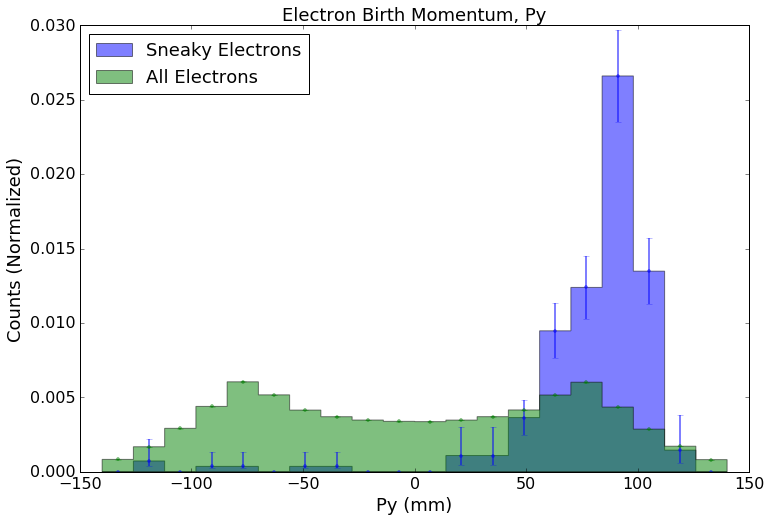

In [54]:
hist(df_ntpart_bads.query('pdg==11 and parent_pdg==13').py, bins=20, alpha=0.5, normed=True, range=(-140,140), label='Sneaky Electrons', histtype='stepfilled', errorbars=True)
hist(df_ntpart.query('pdg==11 and parent_pdg==13').py, bins=20, alpha=0.5, normed=True, range=(-140,140), label='All Electrons', histtype='stepfilled', errorbars=True)
plt.title('Electron Birth Momentum, Py')
plt.xlabel('Py (mm)')
plt.ylabel('Counts (Normalized)')
plt.legend(loc='best')

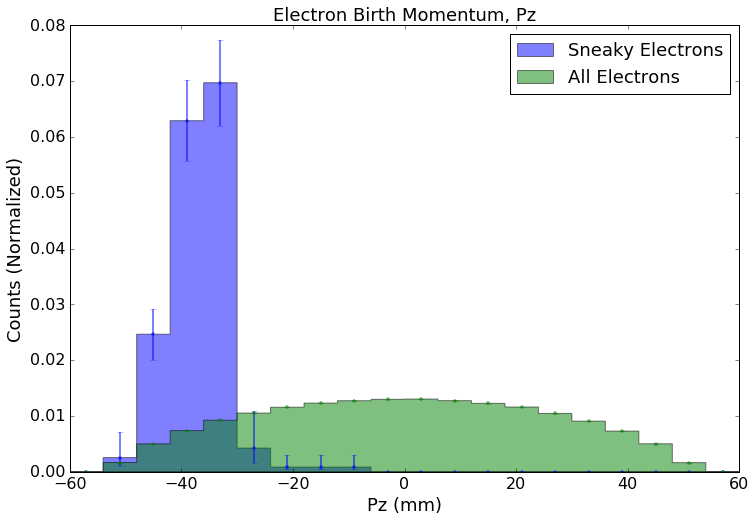

In [55]:
hist(df_ntpart_bads.query('pdg==11 and parent_pdg==13').pz, bins=20, alpha=0.5, normed=True, range=(-60,60), label='Sneaky Electrons', histtype='stepfilled', errorbars=True)
hist(df_ntpart.query('pdg==11 and parent_pdg==13').pz, bins=20, alpha=0.5, normed=True, range=(-60,60), label='All Electrons', histtype='stepfilled', errorbars=True)
plt.title('Electron Birth Momentum, Pz')
plt.xlabel('Pz (mm)')
plt.ylabel('Counts (Normalized)')
plt.legend(loc='best')

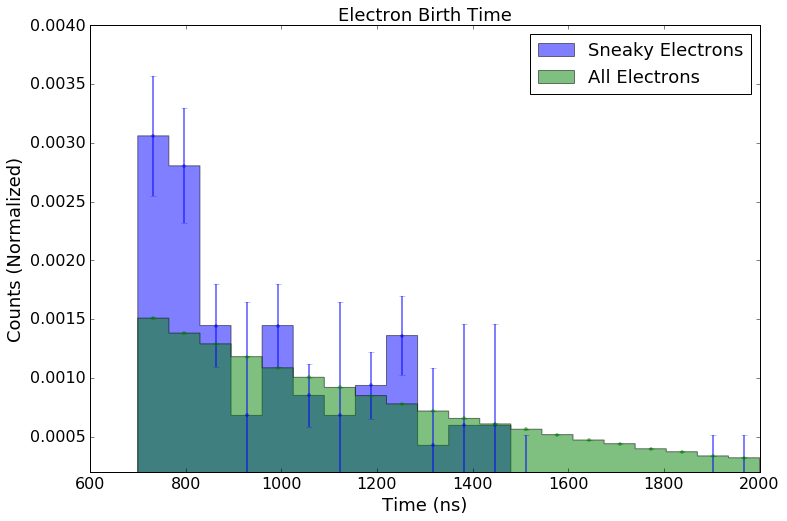

In [62]:
hist(df_ntpart_bads.query('pdg==11 and parent_pdg==13').time, bins=20, alpha=0.5, normed=True, range=(700,2000), label='Sneaky Electrons', histtype='stepfilled', errorbars=True)
hist(df_ntpart.query('pdg==11 and parent_pdg==13').time, bins=20, alpha=0.5, normed=True, range=(700,2000), label='All Electrons', histtype='stepfilled', errorbars=True)
plt.ylim(ymax=0.004)
plt.title('Electron Birth Time')
plt.xlabel('Time (ns)')
plt.ylabel('Counts (Normalized)')
plt.legend(loc='best')

In [ ]:
#bads_runevt = df_nttvd.query('pdg==11 and z<11200 and p>85').index.unique()
#df_mu = df_ntpart.query('pdg==13 and time>0 and 100<xstop<575 and 150>ystop>-600')[0:20000].reset_index()
df_mu_bads = df_ntpart.ix[bads_index].query('pdg==13 and time>0')
#df_mu = df_ntpart.query('pdg==13 and time>0').reset_index()

df_mu_bads.name = 'Muons'
mu2e_plot3d_ptrap(df_mu_bads,
                  'zstop','xstop','ystop', x_range=[3700,17500], y_range = [-1000,1000], z_range=[-1000,1000], save_name=None,
                   df_xray=df_xray, color='pstop', title='Muon Decay Location Yeilding Sneaky Electrons')

# Placing Limits

In [ ]:
df_sig_fake = df_trkana_dems.query('103.85<dem_mom<105.1')

In [ ]:
df_sig_fake_cut = df_trkana_dems.query('103.85<dem_mom<105.1 and '+cut_string)

In [ ]:
print len(df_trkana_dems_no_uems.query('103.85<dem_mom<105.1')), len(df_sig_fake), len(df_sig_fake_cut)

In [ ]:
len(df_sig_fake_cut)

### Pessimistic Case Scenario:
1. Muons trapped are all at ~140 MeV (approaching maximum trapping energy, radius will become too large)
2. Perfect Trigger
3. Infinite timing window
4. No cuts after track reco

11,375,400 starting muons, trapped, 5 electrons reco'd in signal window:

4.4e-7 reco signal fakes/trapped muon (at 140 MeV)

200,000 trapped muons -> ~0.1 BG events

# Comparing with Signal Events

In [10]:
df_trkana_ce_dems = df_trkana_ce.query('dem_mom>0')

In [11]:
cut_string = 'dem_trkqual>0.4 and -80<dem_d0<105 and 450<(dem_d0+2.0/dem_om)<680 and 0.57735<dem_td<1.0'

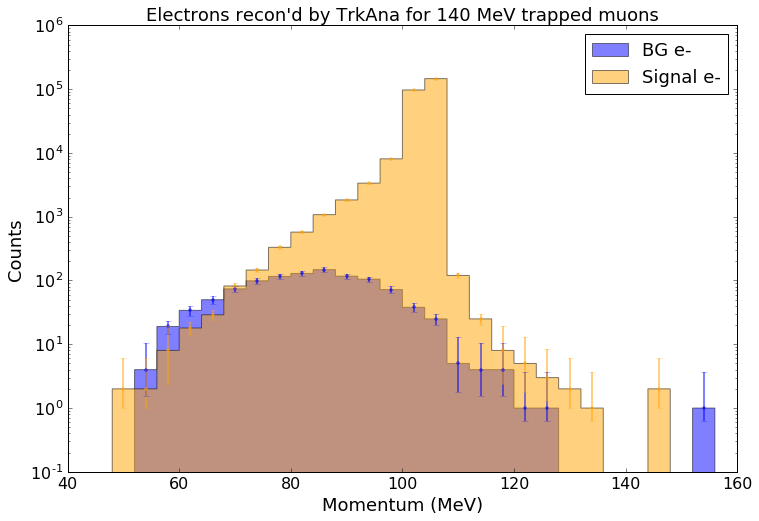

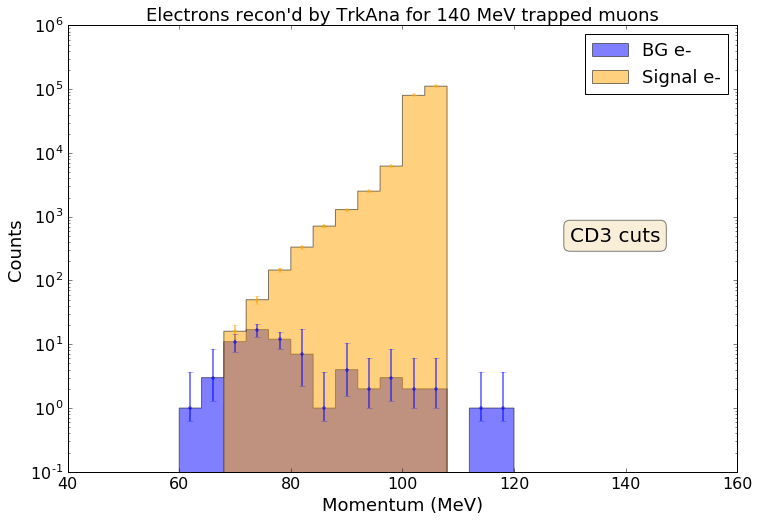

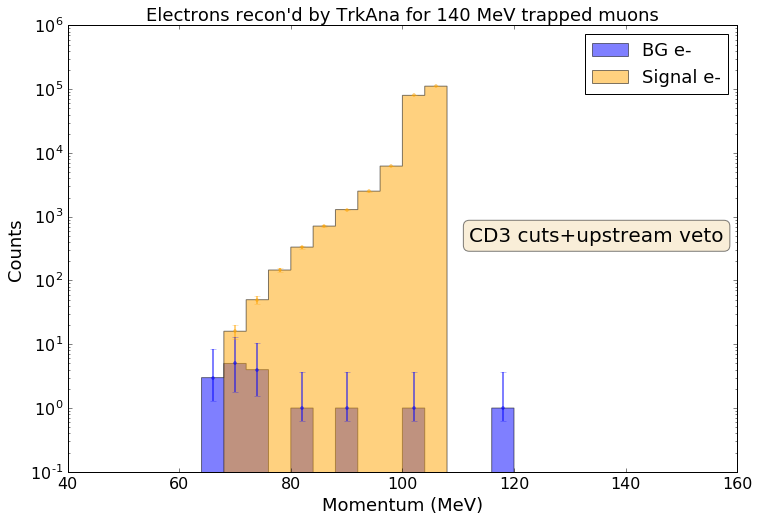

In [32]:
#df_trkana_dems.query(cut_string).dem_mom.hist(bins=30, range=(40,160), label='Sneaky e-', alpha=0.2, normed=True)
#df_trkana_ce_dems.query(cut_string).dem_mom.hist(bins=30, range=(40,160), label='Signal e-', alpha=0.2, normed=True)
hist(df_trkana_dems.dem_mom, bins=30, range=(40,160), label='BG e-', alpha=0.5, histtype='stepfilled', errorbars=True)
hist(df_trkana_ce_dems.dem_mom, bins=30, range=(40,160), label='Signal e-', alpha=0.5, histtype='stepfilled', errorbars=True, color='orange')
plt.yscale('log')
#plt.plot((103.85, 103.85), (0, 160), 'k--', linewidth=3)
#plt.plot((105.1, 105.1), (0, 160), 'k--', linewidth=3)

plt.title("Electrons recon'd by TrkAna for 140 MeV trapped muons")
plt.ylabel('Counts')
plt.xlabel('Momentum (MeV)')
plt.legend(loc='best')

plt.figure()
hist(df_trkana_dems.query(cut_string).dem_mom, bins=30, range=(40,160), label='BG e-', alpha=0.5, histtype='stepfilled', errorbars=True)
hist(df_trkana_ce_dems.query(cut_string).dem_mom, bins=30, range=(40,160), label='Signal e-', alpha=0.5, histtype='stepfilled', errorbars=True, color='orange')
plt.yscale('log')
#plt.plot((103.85, 103.85), (0, 30), 'k--', linewidth=3)
#plt.plot((105.1, 105.1), (0, 30), 'k--', linewidth=3)

plt.title("Electrons recon'd by TrkAna for 140 MeV trapped muons")
plt.ylabel('Counts')
plt.xlabel('Momentum (MeV)')
plt.legend(loc='best')

textstr = 'CD3 cuts'

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.75, 0.55, textstr, transform=plt.gca().transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

plt.figure()
cut_string2 = cut_string+' and uem_mom<20'
hist(df_trkana_dems.query(cut_string2).dem_mom, bins=30, range=(40,160), label='BG e-', alpha=0.5, histtype='stepfilled', errorbars=True)
hist(df_trkana_ce_dems.query(cut_string2).dem_mom, bins=30, range=(40,160), label='Signal e-', alpha=0.5, histtype='stepfilled', errorbars=True, color='orange')
plt.yscale('log')
#plt.plot((103.85, 103.85), (0, 30), 'k--', linewidth=3)
#plt.plot((105.1, 105.1), (0, 30), 'k--', linewidth=3)

plt.title("Electrons recon'd by TrkAna for 140 MeV trapped muons")
plt.ylabel('Counts')
plt.xlabel('Momentum (MeV)')
plt.legend(loc='best')

textstr = 'CD3 cuts+upstream veto'

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
plt.text(0.60, 0.55, textstr, transform=plt.gca().transAxes, fontsize=20,
        verticalalignment='top', bbox=props)

In [ ]:
all_dem = df_trkana_ce.query('dem_mom>0').filter(like='dem').columns

In [33]:
len(df_trkana_dems.query(cut_string2))/float(len(df_trkana_dems.dem_mom))

0.015296367112810707

In [ ]:
plt.errorbar?

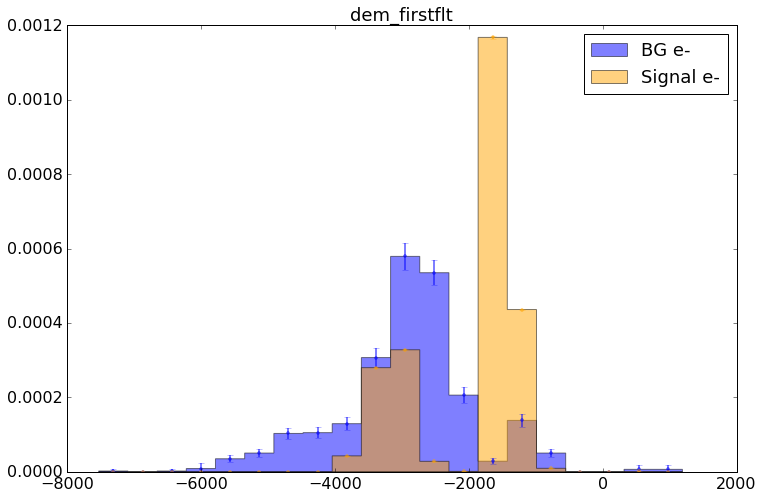

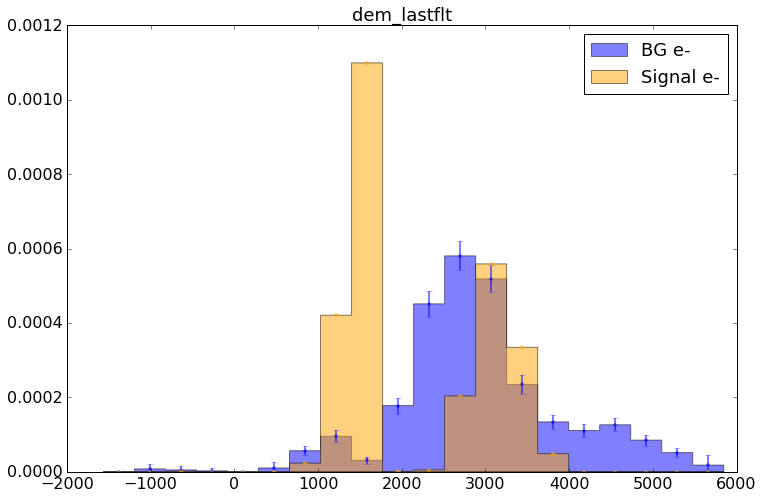

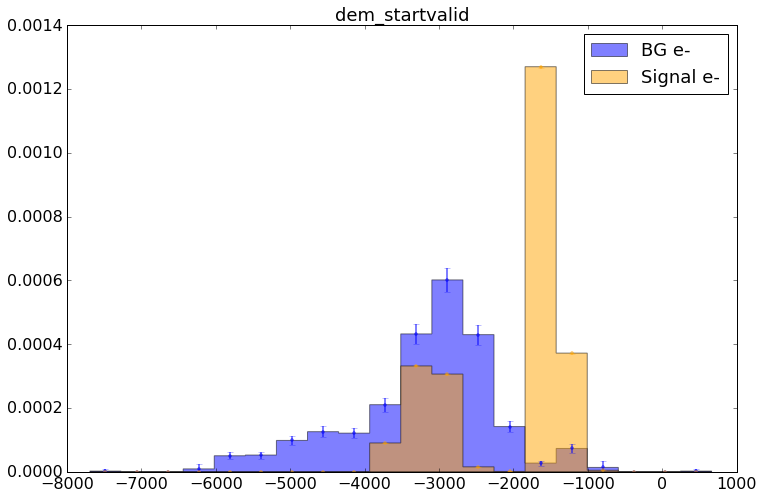

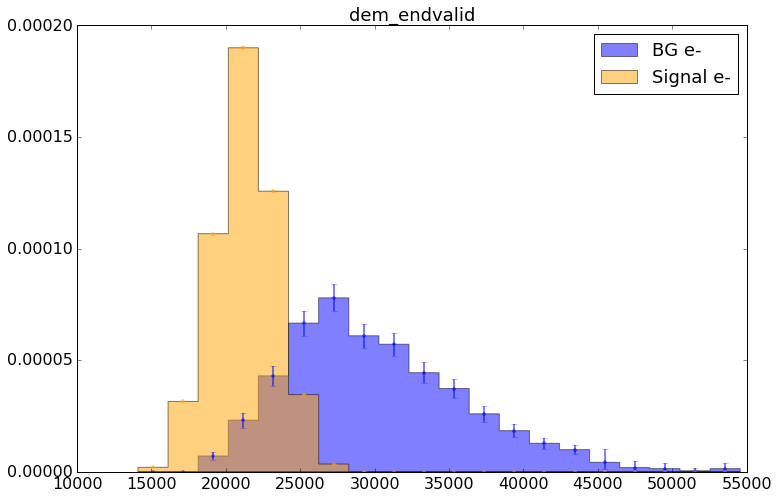

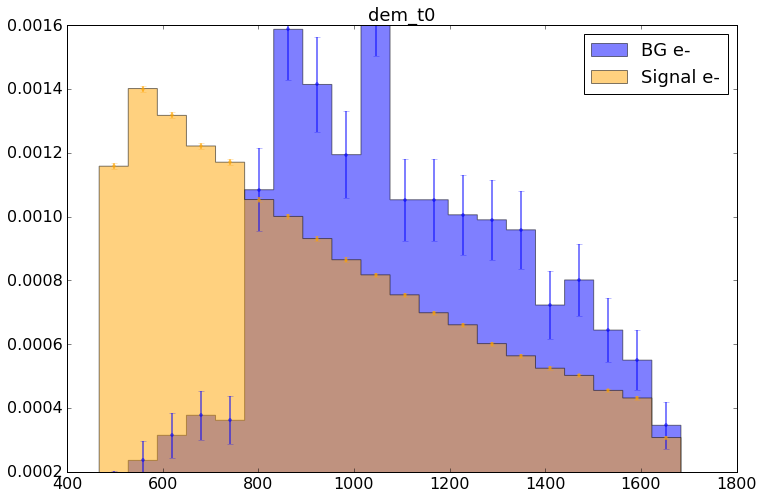

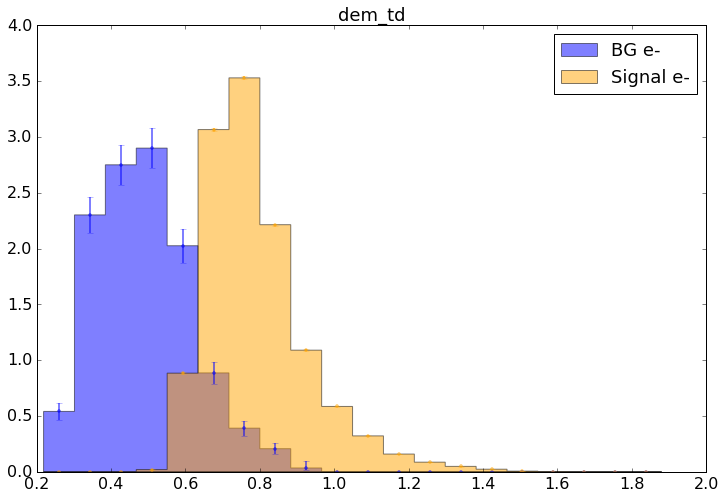

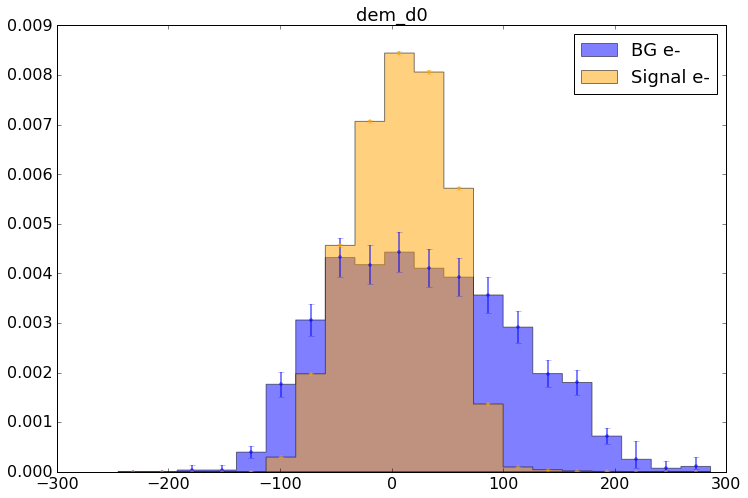

In [13]:
#for dem in all_dem:
for dem in ['dem_firstflt', 'dem_lastflt', 'dem_startvalid', 'dem_endvalid', 'dem_t0', 'dem_td', 'dem_d0']:
    plt.figure()
    h_range=(min(df_trkana_dems[dem].min(), df_trkana_ce_dems[dem].min()),
             max(df_trkana_dems[dem].max(), df_trkana_ce_dems[dem].max()))
    hist(df_trkana_dems[dem], bins=20, normed=True, alpha=0.5, histtype='stepfilled', range=h_range, errorbars=True, label='BG e-')
    hist(df_trkana_ce_dems[dem], bins=20, normed=True, alpha=0.5,histtype='stepfilled', range=h_range, errorbars=True, label='Signal e-', color='orange')
    plt.title(dem)
    plt.legend(loc='best')

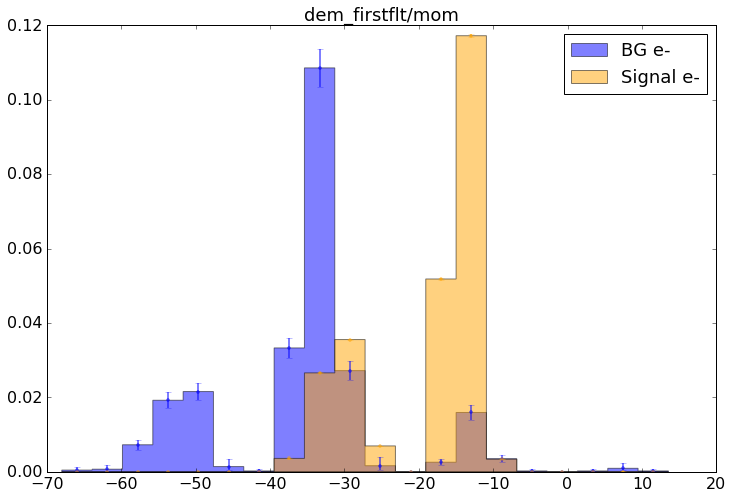

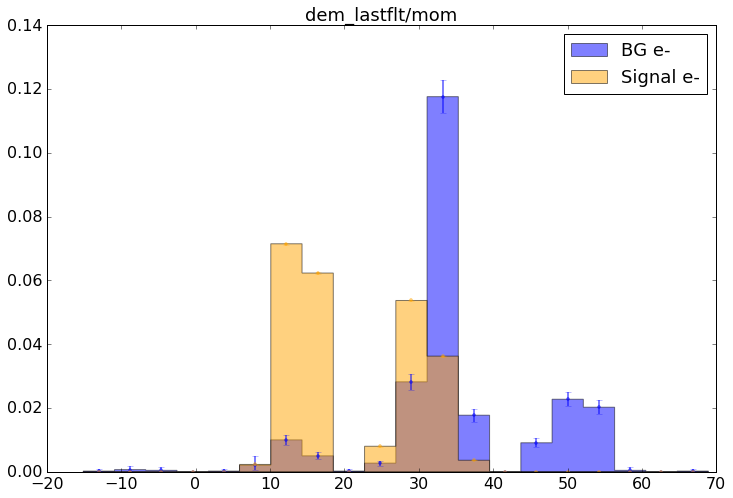

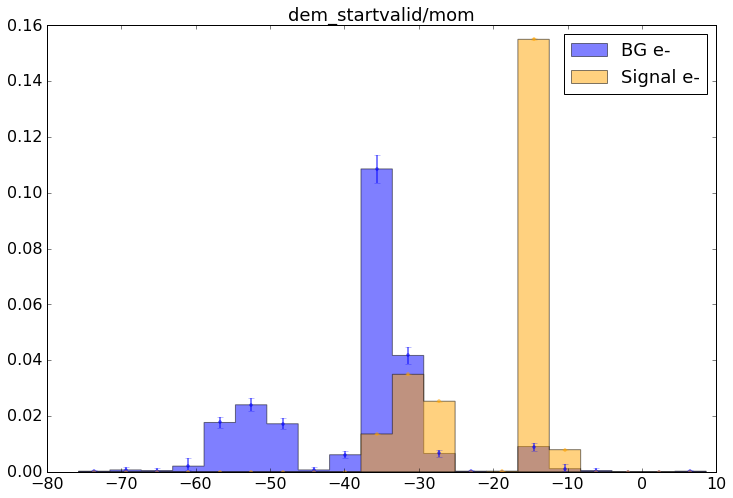

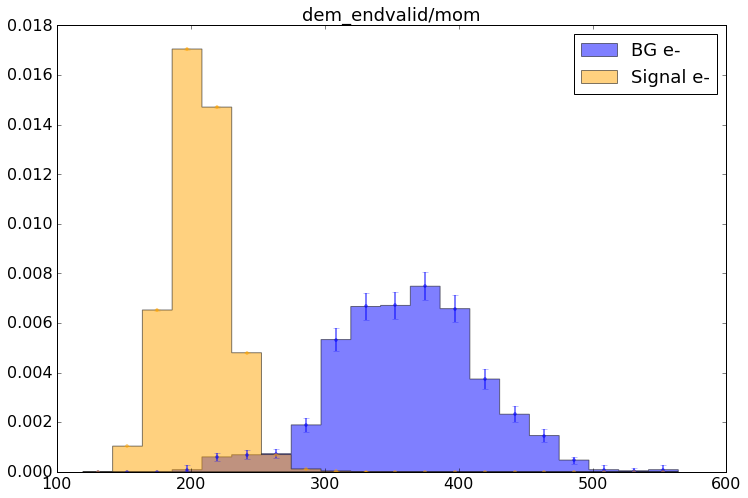

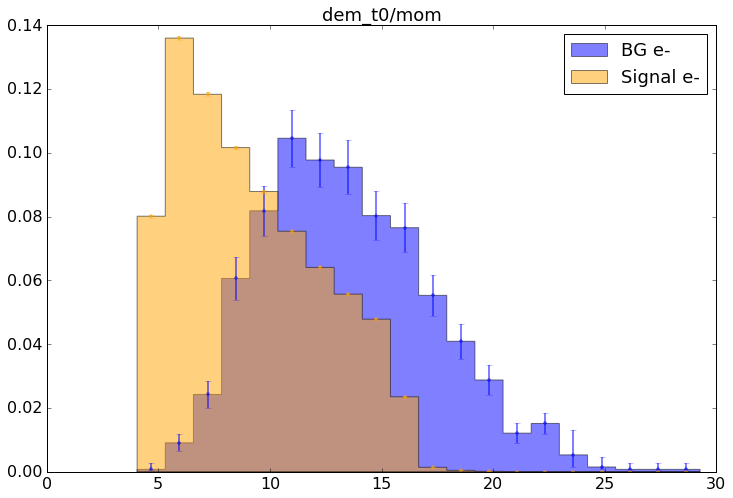

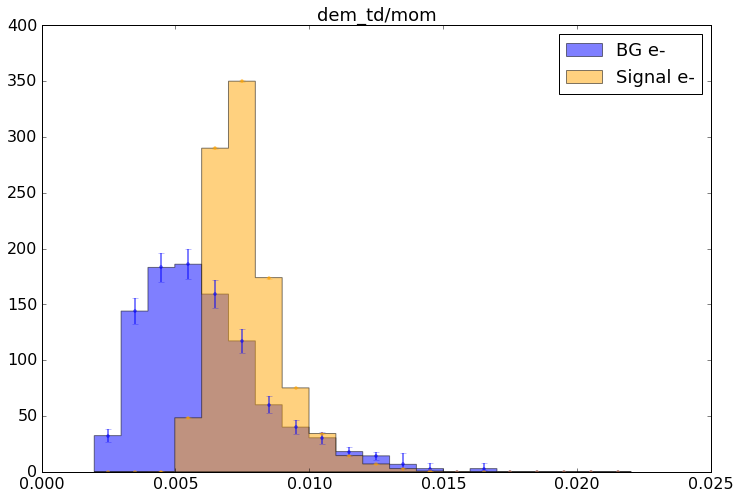

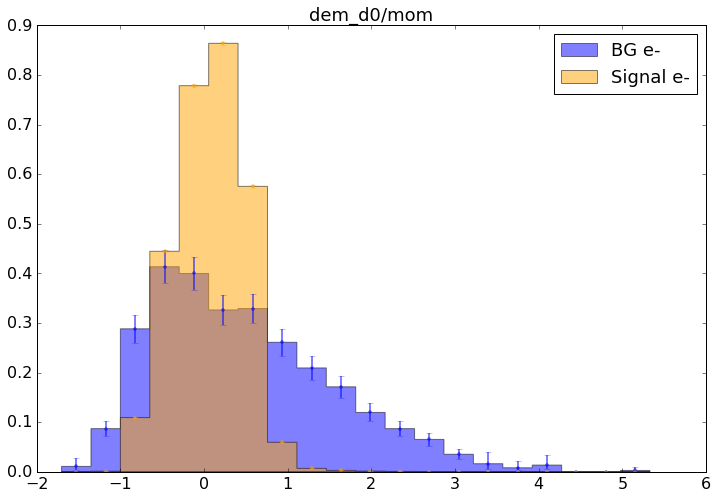

In [14]:
for dem in ['dem_firstflt', 'dem_lastflt', 'dem_startvalid', 'dem_endvalid', 'dem_t0', 'dem_td', 'dem_d0']:
    plt.figure()
    param_sneak = df_trkana_dems[dem]/df_trkana_dems.dem_mom
    param_ce = df_trkana_ce_dems[dem]/df_trkana_ce_dems.dem_mom
    h_range=(min(param_sneak.min(), param_ce.min()),
             max(param_sneak.max(), param_ce.max()))
    hist(param_sneak, bins=20, normed=True, alpha=0.5, range=h_range, histtype='stepfilled', errorbars=True, label='BG e-')
    hist(param_ce, bins=20, normed=True, alpha=0.5, range=h_range, histtype='stepfilled', errorbars=True, label='Signal e-', color='orange')
    plt.title(dem+'/mom')
    plt.legend(loc='best')

In [ ]:
df_sig_fake.query('dem_endvalid/dem_mom<250')

In [ ]:
plt.plot(df_trkana_ce_dems.dem_endvalid, df_trkana_ce_dems.dem_startvalid, 'bo')
plt.plot(df_trkana_dems.dem_endvalid, df_trkana_dems.dem_startvalid, 'ro')

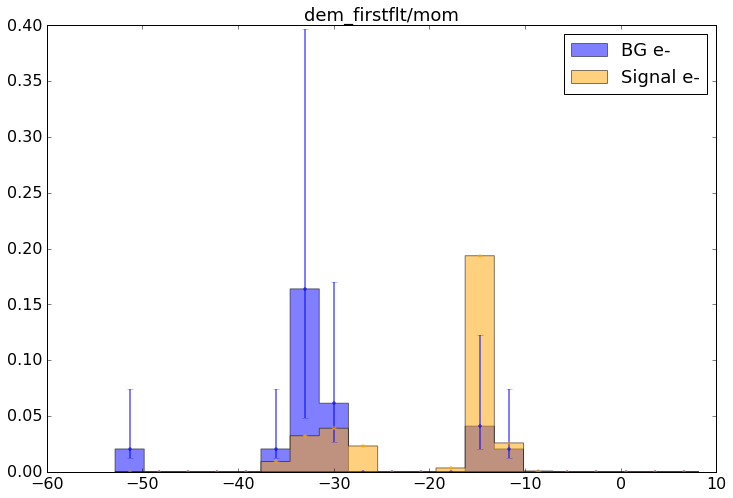

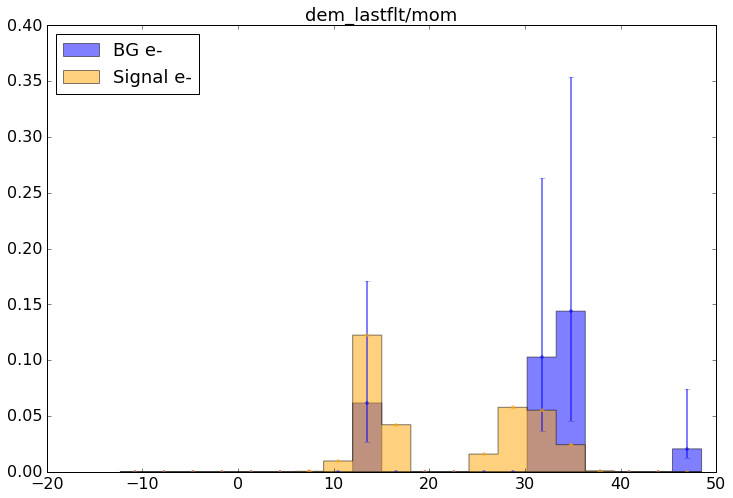

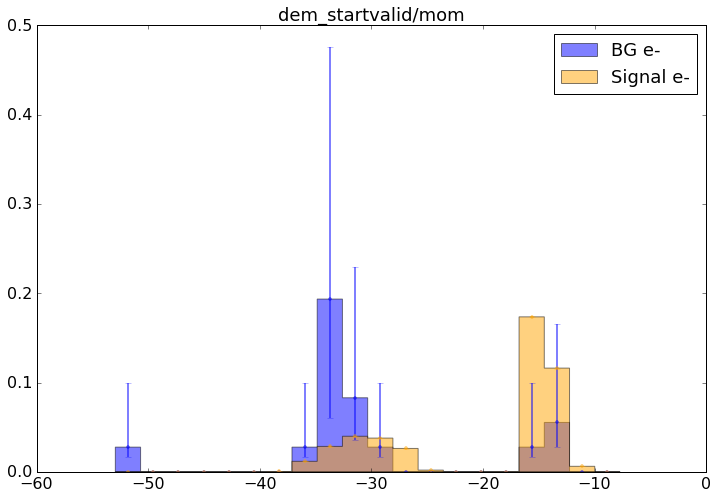

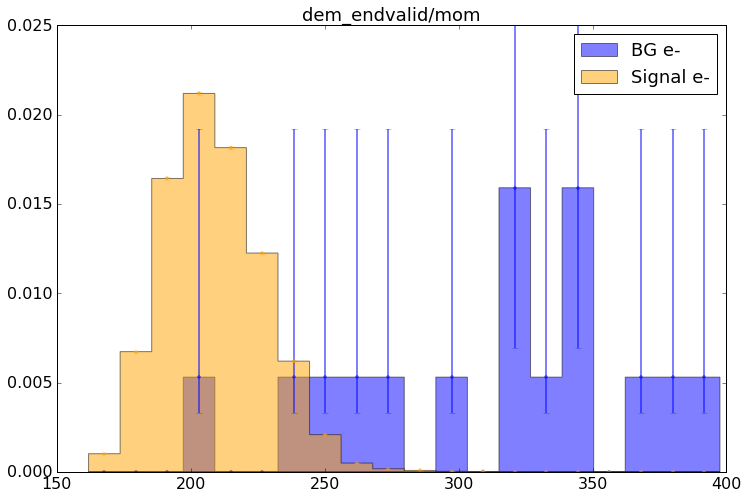

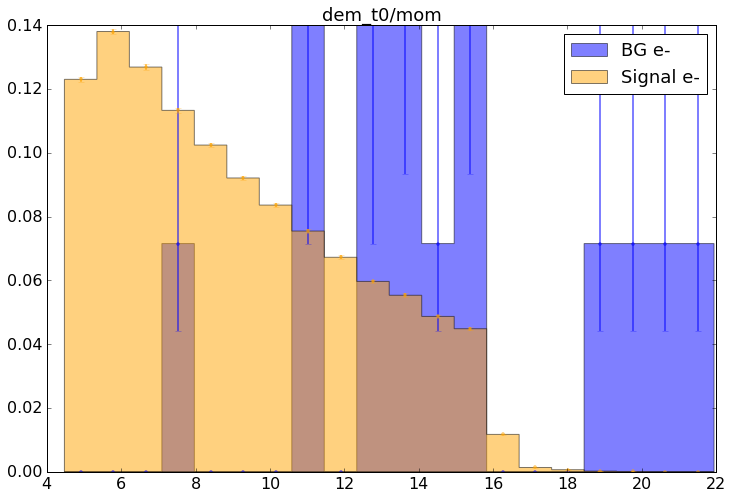

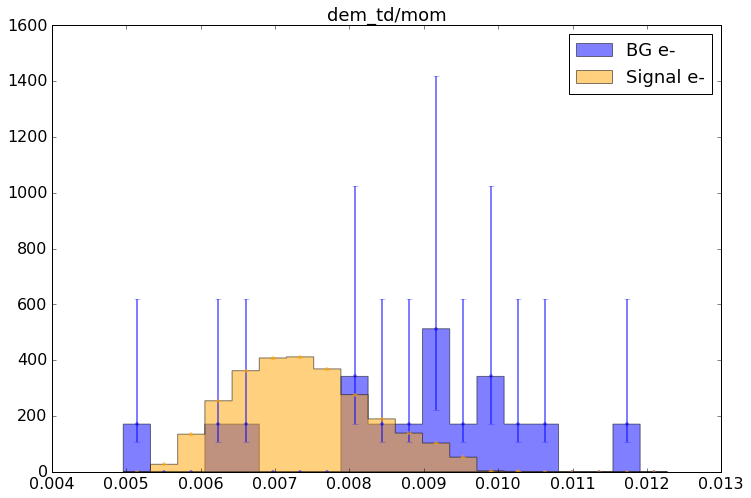

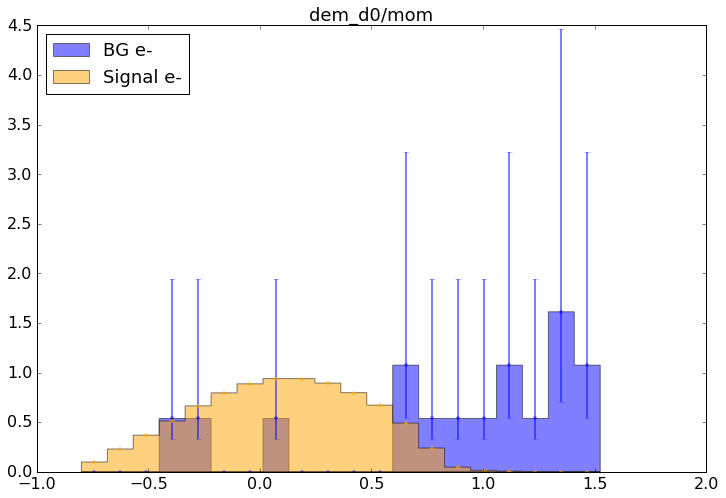

In [34]:
for dem in ['dem_firstflt', 'dem_lastflt', 'dem_startvalid', 'dem_endvalid', 'dem_t0', 'dem_td', 'dem_d0']:
    plt.figure()
    param_sneak = df_trkana_dems.query(cut_string2)[dem]/df_trkana_dems.query(cut_string).dem_mom
    param_ce = df_trkana_ce_dems.query(cut_string2)[dem]/df_trkana_ce_dems.query(cut_string).dem_mom
    h_range=(min(param_sneak.min(), param_ce.min()),
             max(param_sneak.max(), param_ce.max()))
    hist(param_sneak, bins=20, normed=True, alpha=0.5, range=h_range, histtype='stepfilled', errorbars=True, label='BG e-')
    hist(param_ce, bins=20, normed=True, alpha=0.5, range=h_range, histtype='stepfilled', errorbars=True, label='Signal e-', color='orange')
    plt.title(dem+'/mom')
    plt.legend(loc='best')

In [19]:
print len(df_trkana_dems.query('100<dem_mom<110'))

65


In [42]:
print len(df_trkana_dems.query('100<dem_mom<110 and '+cut_string))/11375400.

In [45]:
len(df_trkana_dems.query('100<dem_mom<110 and '+cut_string2))

1

In [40]:
len(df_trkana_dems.query('100<dem_mom<110'))/11375400.

5.714084779436328e-06

In [43]:
print 2389

In [46]:
cut_string2

'dem_trkqual>0.4 and -80<dem_d0<105 and 450<(dem_d0+2.0/dem_om)<680 and 0.57735<dem_td<1.0 and uem_mom<20'

In [48]:
len(df_trkana_dems.query('100<dem_mom<110'))

65